# 零帧起手，3个典型场景范例带你上手uv一站式环境管理~

前方干货预警，这可能是你能够找到的最清晰最具实操性的uv环境管理保姆级教程，在jupyter环境下演示~

uv是一个现代化的一站式Python项目环境管理工具。

uv 使用Rust语言开发，速度杠杠的，热度正持续飙升中，github星星已超过40k，预估将来会完全代替掉pip/pyenv/poetry这些工具~

在我看来，uv具有如下3个主要优点： 

* 非常快。 安装包时比pip快10~100倍。

* 兼容pip。 安装包时兼容pip语法，如`uv pip install/uninstall numpy`。

* 一站式。 一个命令支持Python项目环境管理全流程功能。包括：包管理，项目管理，虚拟环境管理，Python版本管理，package发布，tool管理。

现在我主要用uv搞搞项目环境，然后大量借助copilot/cursor/trae这些AI编程工具搞搞代码。

综合使用 uv项目管理+AI代码编程 来搞Python项目，简直爽歪歪啊。

那么uv复杂吗？你可以说有些复杂，但是核心用法其实非常简单，对我来说，最高频的命令就如下5个。

```bash 
uv pip install torch --system  #在默认Python环境中安装torch库 
uv init project  #初始化项目project，会创建项目独有的虚拟环境
uv run main.py  #使用项目环境直接运行 main.py
uv venv #新建虚拟环境
uv help  #获取uv的帮助
```

下面是uv的核心应用场景解析，以及在jupyter notebook环境下演示 uv 的操作步骤代码范例。


## 〇，pip很好？为什么还要用uv？

有同学会说，pip很好啊，为什么还要用uv?

对我来说，uv主要解决了我的如下几个场景下的痛点。所以有它的独特价值。



### 1，pip安装慢的问题

有时候pip安装一个大点的依赖包如torch，可能要十几分钟(已经切换成国内源)。

然后还可能中间因为各种原因报错，uv因为是用rust写的，会快10到100倍。

体验好多了。

下面是无痛替换pip成uv对应的代码。


```bash
uv pip install -U opencv-p -i https://pypi.tuna.tsinghua.edu.cn/simple  --system 
uv pip install -r requirments.txt 
```


### 2，虚拟环境管理


有时候我们用pip安装了很多包，做不同类型任务的时候可能会因为依赖冲突导致有些库用不了了。

其实多弄几个python虚拟环境是很有必要的。

比如传统机器学习库lightgbm相关的一个环境ml, 视觉任务的一个环境cv, 自然语言处理的搞一个环境nlp.

这样能够防止一个崩掉其它的不受影响。极端情况下也可以删掉某个重开一个虚拟环境。

但是 pip 本身是不能做虚拟环境管理的，以前可能要借助pyenv, virtualenv这些工具。

现在 uv就可以做到，而且更快。

创建好的虚拟环境我们可以把它们注册到jupyter notebook的kernel，方便随时根据任务需要切换内核。


```bash
uv venv
uv pip install lightgbm --default-index  https://pypi.tuna.tsinghua.edu.cn/simple 
```


### 3，项目环境管理

如果我们要做一个比较大型的项目，针对这个项目来做一个项目环境是很有必要的。

项目相关的依赖都应该明明白白地写在项目的配置文件中，后面在不同的机器上也能够很快地搭建起这个环境。

很遗憾，pip也做不了这个功能。有个叫做poetry的库能做，但是比较慢。

现在，uv就能够更快更方便地帮我们做好项目的虚拟环境管理，并且可以用uv run 直接应用项目环境来跑代码，无需激活环境。

此外，uv也能够用uv build 和 uv publish 把项目打包和发布到pypi上.

```bash 
uv init .
uv add  pandas --default-index  https://pypi.tuna.tsinghua.edu.cn/simple  
uv run main.py 
uv build 
uv publish 
```

## 一， 安装uv 

可以使用pip安装uv 

In [ ]:
!pip install uv 

In [ ]:
# 也可以直接源码安装(macOS and Linux)
#!curl -LsSf https://astral.sh/uv/install.sh | sh

In [ ]:
#!uv version 
!uv --help

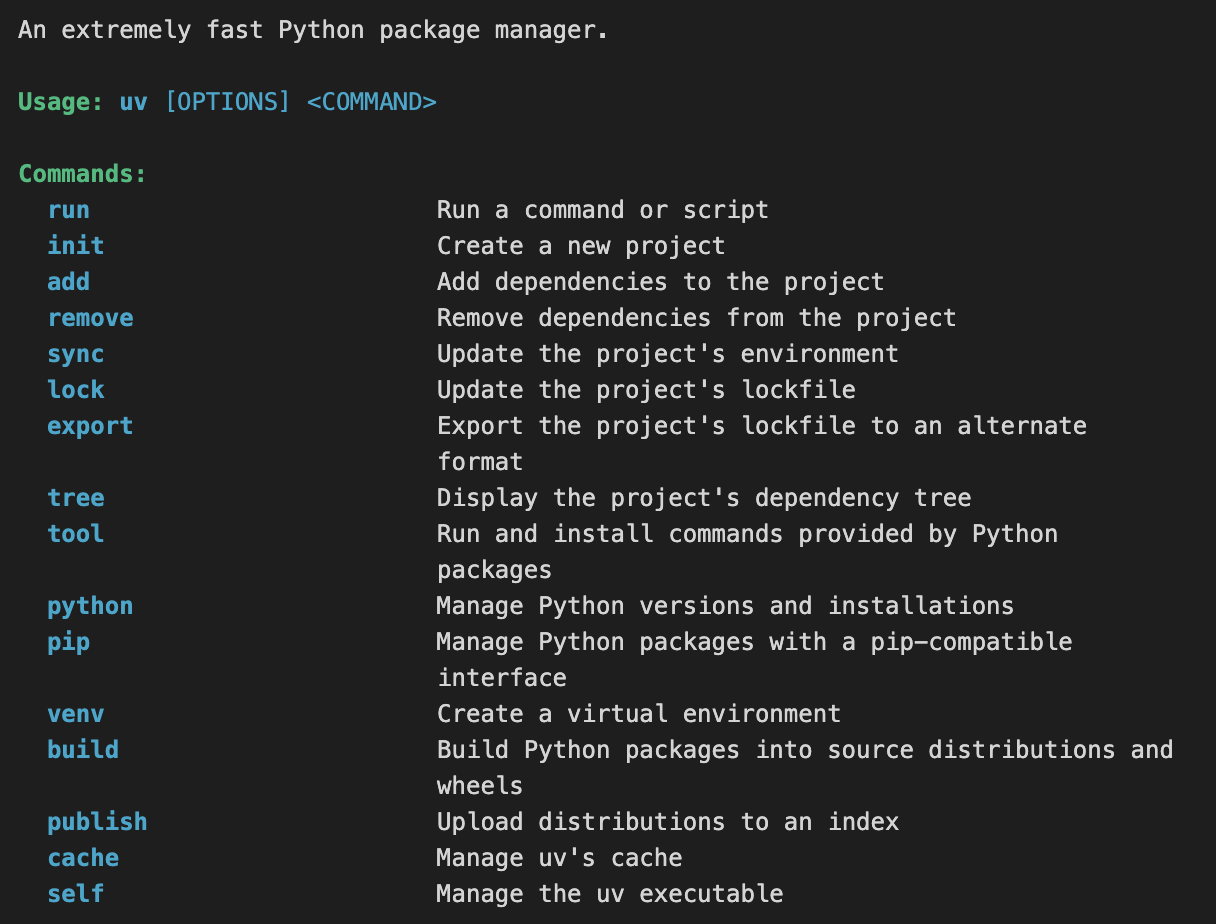

## 二，依赖包管理(替代pip)

下面范例演示使用 pip 安装pypi库的过程，--system表示是安装到系统默认Python环境。

uv安装库的速度真的飞快，一些大的包如pandas，torch，下载好了之后只要几秒钟就安装完了。


In [ ]:
!uv pip install -U opencv-p -i https://pypi.tuna.tsinghua.edu.cn/simple  --system 

In [ ]:
!uv pip install -U torch -i https://pypi.tuna.tsinghua.edu.cn/simple  --system 

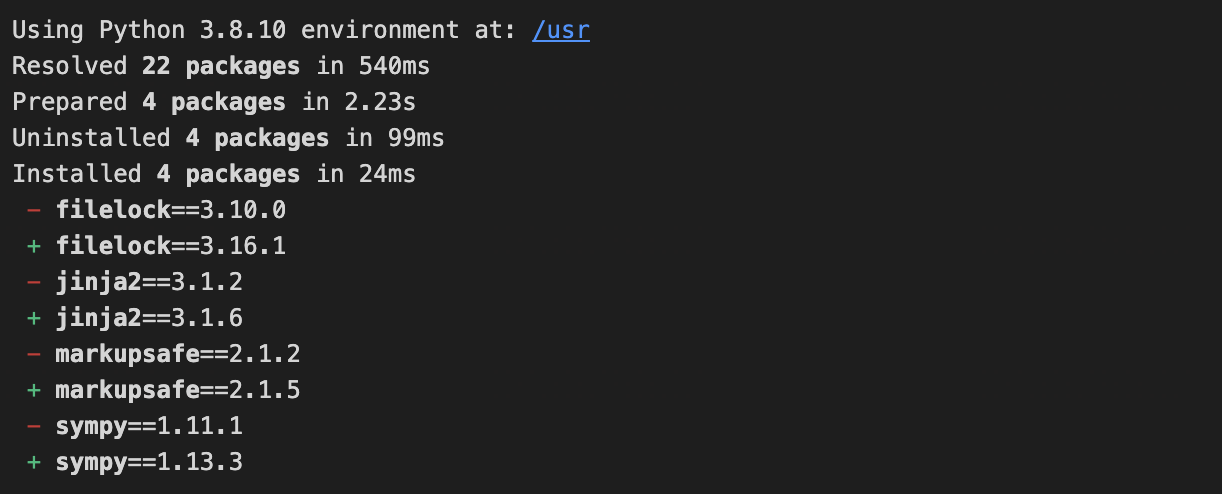

## 三，虚拟环境管理

下面的范例演示使用uv 创建虚拟环境，并将虚拟环境添加到jupyter kernel的操作过程。

很多时候解决环境问题最简单的方法就是隔离不同需求类型的项目的环境。




大家井水不犯河水，就不容易有包版本冲突。




### 1，创建虚拟环境

In [ ]:
#在当前路径下新建虚拟环境，默认名称为 .venv  
!uv venv #--python 3.13 

### 2，虚拟环境安装库

In [ ]:
#在 虚拟环境 中安装 opencv库
!uv pip install opencv-python --default-index  https://pypi.tuna.tsinghua.edu.cn/simple 

### 3，激活虚拟环境

In [87]:
%%bash
#linux/macos环境
cd .venv/bin
source activate
cd ../..

In [ ]:
%%bash 
#windows环境
#cd .venv/Scripts
#activate
#cd ../..

### 4，添加到jupyter kernel 

In [1]:
!python -m ipykernel install --user --name opencv --display-name "opencv"

In [78]:
#查看当前内核
!jupyter kernelspec list 

Available kernels:
  python3    /usr/local/share/jupyter/kernels/python3


In [ ]:
#移除内核
#!yes|jupyter kernelspec remove opencv

## 三，项目管理

下面演示uv的项目管理功能。如果你要做一个比较规范的项目，建议用uv init来完整地管理它的相关环境依赖。

项目相关的依赖都会明明白白地写在项目的配置文件中，后面在不同的机器上也能够很快地搭建起这个环境。

并且这个项目有独立的虚拟环境，不受到系统下Python环境的。


In [1]:
#在当前路径下初始化项目，如果要在某个路径下新建一个项目，可以使用 uv init myproject
!uv init . 

Initialized project `notebooks` at `/Users/liangyun2/CodeFiles/blog-robot/notebooks`


In [2]:
!cat pyproject.toml 

In [3]:
!cat main.py 

def main():
    print("Hello from notebooks!")


if __name__ == "__main__":
    main()


In [ ]:
!uv add  pandas --default-index  https://pypi.tuna.tsinghua.edu.cn/simple  

In [ ]:
!uv add lightgbm --default-index  https://pypi.tuna.tsinghua.edu.cn/simple   

In [6]:
!uv run main.py 

Hello from notebooks!


In [3]:
!cat pyproject.toml 

In [7]:
!uv tree 

Resolved 9 packages in 0.29ms
notebooks v0.1.0
├── lightgbm v4.6.0
│   ├── numpy v2.2.3
│   └── scipy v1.15.2
│       └── numpy v2.2.3
└── pandas v2.2.3
    ├── numpy v2.2.3
    ├── python-dateutil v2.9.0.post0
    │   └── six v1.17.0
    ├── pytz v2025.1
    └── tzdata v2025.1


In [ ]:
#项目打包
#!uv build 

In [ ]:
#项目发布到pypi，需要注册了pypi账号，使用token
#!uv publish 